# The Boston Housing Assess Dataset Analysis Project

In [2]:
# Part I: Initial data preprocessing
# In this Notebook, we will clean up one dataset and save it for further analysis. 

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from scipy.stats import skew

In [4]:
# Folders and filename
folder = 'M:\\Work\\Study\\WPI-DS\\CurrentCourse-DS504\\DataSets\\SelectedDataSet\\'
subOrg = 'BigDataset_Download/'
subOut = 'BigDataset_Preprocess/'
file2020 = 'BostonHousing_2020.csv'
datafile = folder + subOrg + file2020

print('Folder nameIn:\n', folder+subOrg)
print('Folder nameOut:\n', folder+subOut)
print('Input file name:\n', datafile)


Folder nameIn:
 M:\Work\Study\WPI-DS\CurrentCourse-DS504\DataSets\SelectedDataSet\BigDataset_Download/
Folder nameOut:
 M:\Work\Study\WPI-DS\CurrentCourse-DS504\DataSets\SelectedDataSet\BigDataset_Preprocess/
Input file name:
 M:\Work\Study\WPI-DS\CurrentCourse-DS504\DataSets\SelectedDataSet\BigDataset_Download/BostonHousing_2020.csv


In [5]:
dataIn = pd.read_csv(datafile)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6,15,27,28,29,34,35,36,37,38,39,40,41,42,44,45,46,47,48,58,59,64,65,66,67,68,69,70,72,73,74) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
print(np.shape(dataIn))
dataIn.head()


(175052, 75)


,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,100271002,100271000.0,100271000,356,PRINCETON,ST,1,2128.0,102,CD,...,NaN,NaN,F - Full Eat In,M - Modern,W - Ht Water/Steam,N - None,0.0,N - Normal,G - Good,A - Average
1,100271004,100271000.0,100271000,356,PRINCETON,ST,2,2128.0,102,CD,...,NaN,NaN,F - Full Eat In,M - Modern,W - Ht Water/Steam,N - None,0.0,N - Normal,G - Good,A - Average
2,100271006,100271000.0,100271000,356,PRINCETON,ST,3,2128.0,102,CD,...,NaN,NaN,F - Full Eat In,M - Modern,W - Ht Water/Steam,N - None,0.0,N - Normal,G - Good,A - Average
3,100272000,NaN,100272000,352,PRINCETON,ST,NaN,2128.0,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100273000,NaN,100273000,,PRINCETON,ST,NaN,2128.0,132,RL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Remove text columns in the front
all_data = dataIn.loc[:,'LU':'U_VIEW']
print('Original:', dataIn.shape)
print('Subgroup:', all_data.shape)


Original: (175052, 75)
Subgroup: (175052, 66)


In [8]:
#Remove identified text columns and remove them
droppedColumns = ['OWNER','MAIL_ADDRESS','MAIL CS','MAIL_ZIPCODE','MAIL_ADDRESSEE']
print('Before drop:', np.shape(all_data))
all_data.drop(droppedColumns, axis=1, inplace=True)
print('After drop:', np.shape(all_data))

Before drop: (175052, 66)
After drop: (175052, 61)


In [9]:
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175052 entries, 0 to 175051
Data columns (total 61 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   LU               175052 non-null  object 
 1   OWN_OCC          175052 non-null  object 
 2   AV_LAND          175052 non-null  int64  
 3   AV_BLDG          175052 non-null  int64  
 4   AV_TOTAL         175052 non-null  int64  
 5   GROSS_TAX        175052 non-null  float64
 6   LAND_SF          175052 non-null  int64  
 7   YR_BUILT         151644 non-null  float64
 8   YR_REMOD         88795 non-null   float64
 9   GROSS_AREA       152626 non-null  float64
 10  LIVING_AREA      152626 non-null  float64
 11  NUM_FLOORS       151538 non-null  float64
 12  STRUCTURE_CLASS  0 non-null       float64
 13  R_BLDG_STYL      61344 non-null   object 
 14  R_ROOF_TYP       61343 non-null   object 
 15  R_EXT_FIN        61343 non-null   object 
 16  R_TOTAL_RMS      61340 non-null   floa

In [10]:
# Highly correlated columns
diff = all_data['AV_TOTAL'] - all_data['AV_LAND'] - all_data['AV_BLDG']
print(diff.describe())

count    175052.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
dtype: float64


In [12]:
%matplotlib inline
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
colName = 'AV_TOTAL'

Text(0.5,1,'log Total Assess Value')

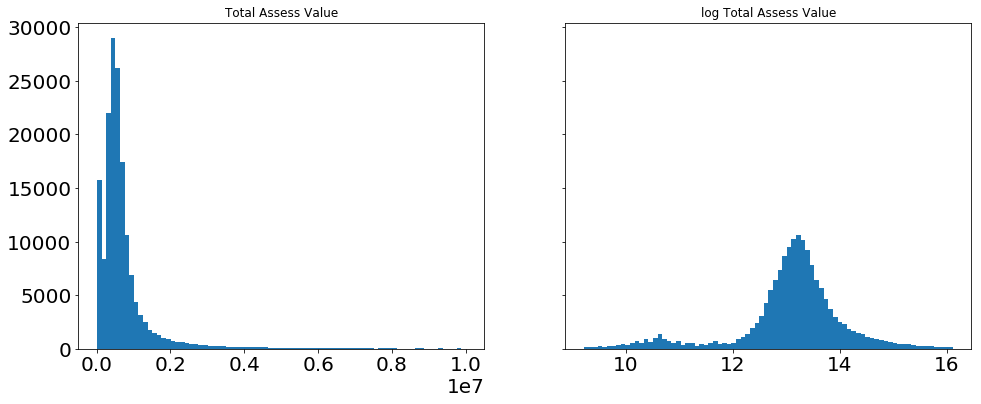

In [13]:
# plot one column data distribution before and after log scale
y=all_data[colName]
matplotlib.rcParams['figure.figsize'] = (16.0, 6.0)
prices = pd.DataFrame({"Total Assess Value":y, "log(Total Assess Value + 1)":np.log1p(y)})
fig, axs = plt.subplots(1, 2, sharey=True)
axs[0].hist(prices.iloc[:,0], bins=80)
axs[1].hist(prices.iloc[:,1], bins=80)
axs[0].set_title('Total Assess Value')
axs[1].set_title('log Total Assess Value')

In [14]:
#Remove outliers in AV_TOTAL values
minV = 10000
maxV = 10000000
print('Before removal:', all_data.shape)
all_data.drop(all_data[all_data['AV_TOTAL'] < minV].index, inplace = True)
all_data.drop(all_data[all_data['AV_TOTAL'] > maxV].index, inplace = True)
print('After removal:', all_data.shape)


Before removal: (161296, 61)
After removal: (161296, 61)


In [15]:
# Prepare log transform for skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print('Total numeric features:', len(numeric_feats))
print(numeric_feats)

Total numeric features: 27
Index(['AV_LAND', 'AV_BLDG', 'AV_TOTAL', 'GROSS_TAX', 'LAND_SF', 'YR_BUILT',
       'YR_REMOD', 'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS',
       'STRUCTURE_CLASS', 'R_TOTAL_RMS', 'R_BDRMS', 'R_FULL_BTH', 'R_HALF_BTH',
       'R_FPLACE', 'S_NUM_BLDG', 'S_UNIT_RES', 'S_UNIT_COM', 'S_UNIT_RC',
       'U_BASE_FLOOR', 'U_NUM_PARK', 'U_TOT_RMS', 'U_BDRMS', 'U_FULL_BTH',
       'U_HALF_BTH', 'U_FPLACE'],
      dtype='object')


In [16]:
numeric_data = all_data[numeric_feats]
print('Column wise distribution of null values in the dataset')
print(numeric_data.isnull().sum())
print("Number of Rows", len(numeric_data))
print('Total null values in the dataset: ', numeric_data.isnull().values.sum())

Column wise distribution of null values in the dataset
AV_LAND                 0
AV_BLDG                 0
AV_TOTAL                0
GROSS_TAX               0
LAND_SF                 0
YR_BUILT            21157
YR_REMOD            81848
GROSS_AREA          11206
LIVING_AREA         11206
NUM_FLOORS          21355
STRUCTURE_CLASS    161296
R_TOTAL_RMS         99995
R_BDRMS             99995
R_FULL_BTH          99991
R_HALF_BTH          99993
R_FPLACE            99993
S_NUM_BLDG         161296
S_UNIT_RES         161296
S_UNIT_COM         161296
S_UNIT_RC          161296
U_BASE_FLOOR        96069
U_NUM_PARK          96080
U_TOT_RMS           96066
U_BDRMS             96082
U_FULL_BTH          96048
U_HALF_BTH          96054
U_FPLACE            96048
dtype: int64
Number of Rows 161296
Total null values in the dataset:  2125666


In [17]:
# Calc skew value for numeric features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
print(skewed_feats)

AV_LAND             8.857290
AV_BLDG             4.689974
AV_TOTAL            4.717553
GROSS_TAX           7.837773
LAND_SF            32.586333
YR_BUILT            0.729041
YR_REMOD          -47.096803
GROSS_AREA         22.131966
LIVING_AREA        22.423521
NUM_FLOORS          3.536790
STRUCTURE_CLASS          NaN
R_TOTAL_RMS         0.624010
R_BDRMS             1.098354
R_FULL_BTH          1.008019
R_HALF_BTH          1.396937
R_FPLACE            3.369355
S_NUM_BLDG               NaN
S_UNIT_RES               NaN
S_UNIT_COM               NaN
S_UNIT_RC                NaN
U_BASE_FLOOR        4.696242
U_NUM_PARK          1.208185
U_TOT_RMS           1.145452
U_BDRMS             1.107817
U_FULL_BTH          2.295808
U_HALF_BTH          1.818729
U_FPLACE            2.423682
dtype: float64


In [18]:
# keep 0.75 not 1.25
skewed_feats = skewed_feats[np.abs(skewed_feats) > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [19]:
print('Total skewed features:', len(skewed_feats))
print(skewed_feats)

Total skewed features: 20
Index(['AV_LAND', 'AV_BLDG', 'AV_TOTAL', 'GROSS_TAX', 'LAND_SF', 'YR_REMOD',
       'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS', 'R_BDRMS', 'R_FULL_BTH',
       'R_HALF_BTH', 'R_FPLACE', 'U_BASE_FLOOR', 'U_NUM_PARK', 'U_TOT_RMS',
       'U_BDRMS', 'U_FULL_BTH', 'U_HALF_BTH', 'U_FPLACE'],
      dtype='object')


In [20]:
#Second drop for all NAN columns
droppedColumns = ['STRUCTURE_CLASS','S_UNIT_RC','S_NUM_BLDG','S_UNIT_RES','S_UNIT_COM']
#droppedColumns = ['S_BLDG_STYL','S_EXT_FIN', 'S_EXT_CND']
print('Before drop:', np.shape(all_data))
all_data.drop(droppedColumns, axis=1, inplace=True)
print('After drop:', np.shape(all_data))

Before drop: (161296, 61)
After drop: (161296, 56)


In [27]:
# Use this block to count nans existed in the dataset and for each column
print('Column wise distribution of null values in the dataset')
print(all_data.isnull().sum())
print("Number of Rows", len(all_data))

Column wise distribution of null values in the dataset
LU                     0
OWN_OCC                0
AV_LAND                0
AV_BLDG                0
AV_TOTAL               0
GROSS_TAX              0
LAND_SF                0
YR_BUILT               0
YR_REMOD               0
GROSS_AREA             0
LIVING_AREA            0
NUM_FLOORS             0
R_BLDG_STYL        99991
R_ROOF_TYP         99992
R_EXT_FIN          99992
R_TOTAL_RMS            0
R_BDRMS                0
R_FULL_BTH             0
R_HALF_BTH             0
R_BTH_STYLE        99992
R_BTH_STYLE2      107725
R_BTH_STYLE3      134805
R_KITCH           100003
R_KITCH_STYLE      99992
R_KITCH_STYLE2    147346
R_KITCH_STYLE3    147346
R_HEAT_TYP         99992
R_AC               99992
R_FPLACE               0
R_EXT_CND          99992
R_OVRALL_CND       99991
R_INT_CND          99992
R_INT_FIN          99994
R_VIEW             99992
S_BLDG_STYL       161296
S_EXT_FIN         161296
S_EXT_CND         161296
U_BASE_FLOOR        

In [28]:
#Second drop for all NAN columns
droppedColumns = ['S_BLDG_STYL','S_EXT_FIN', 'S_EXT_CND']
#droppedColumns = ['R_KITCH_STYLE2', 'R_KITCH_STYLE2', 'R_BTH_STYLE2', 'R_BTH_STYLE3', 'U_BTH_STYLE2', 'U_BTH_STYLE3']
print('Before drop:', np.shape(all_data))
all_data.drop(droppedColumns, axis=1, inplace=True)
print('After drop:', np.shape(all_data))

Before drop: (161296, 56)
After drop: (161296, 53)


In [29]:
#Fill na value with mean for numerical data
all_data = all_data.fillna(all_data.mean())
print(all_data.shape)

(161296, 53)


In [30]:
print(np.shape(all_data))
display(HTML(all_data.head().to_html()))

(161296, 53)


,LU,OWN_OCC,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,R_BLDG_STYL,R_ROOF_TYP,R_EXT_FIN,R_TOTAL_RMS,R_BDRMS,R_FULL_BTH,R_HALF_BTH,R_BTH_STYLE,R_BTH_STYLE2,R_BTH_STYLE3,R_KITCH,R_KITCH_STYLE,R_KITCH_STYLE2,R_KITCH_STYLE3,R_HEAT_TYP,R_AC,R_FPLACE,R_EXT_CND,R_OVRALL_CND,R_INT_CND,R_INT_FIN,R_VIEW,U_BASE_FLOOR,U_NUM_PARK,U_CORNER,U_ORIENT,U_TOT_RMS,U_BDRMS,U_FULL_BTH,U_HALF_BTH,U_BTH_STYLE,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,CD,Y,0.000000,12.806833,12.806833,8.256407,0.000000,1900.000000,7.610358,6.674561,6.674561,0.693147,NaN,NaN,NaN,10.084974,1.678680,1.077132,0.248965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.233692,NaN,NaN,NaN,NaN,NaN,0.693147,0.000000,N - No,T - Through,1.609438,1.098612,0.693147,0.000000,M - Modern,NaN,NaN,F - Full Eat In,M - Modern,W - Ht Water/Steam,N - None,0.000000,N - Normal,G - Good,A - Average
1,CD,Y,0.000000,12.830408,12.830408,8.279976,0.000000,1900.000000,7.610358,6.684612,6.684612,0.693147,NaN,NaN,NaN,10.084974,1.678680,1.077132,0.248965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.233692,NaN,NaN,NaN,NaN,NaN,1.098612,0.000000,N - No,T - Through,1.791759,1.386294,0.693147,0.000000,M - Modern,NaN,NaN,F - Full Eat In,M - Modern,W - Ht Water/Steam,N - None,0.000000,N - Normal,G - Good,A - Average
2,CD,N,0.000000,12.885123,12.885123,8.334678,0.000000,1900.000000,7.610358,6.812345,6.812345,0.693147,NaN,NaN,NaN,10.084974,1.678680,1.077132,0.248965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.233692,NaN,NaN,NaN,NaN,NaN,1.386294,0.000000,N - No,T - Through,1.791759,1.386294,0.693147,0.000000,M - Modern,NaN,NaN,F - Full Eat In,M - Modern,W - Ht Water/Steam,N - None,0.000000,N - Normal,G - Good,A - Average
3,R3,Y,12.765120,12.782408,13.466947,8.916397,8.517393,1900.000000,7.600315,8.197814,7.785305,1.252763,CV - Conventional,G - Gable,M - Vinyl,13.000000,2.079442,1.386294,0.000000,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In K,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,S - Space Heat,N - None,0.000000,A - Average,A - Average,A - Average,N - Normal,A - Average,1.178433,0.316762,NaN,NaN,1.611546,0.973287,0.831791,0.127162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192492,NaN,NaN,NaN
4,RL,N,10.555839,0.000000,10.555839,6.007584,7.550135,1928.356218,7.600315,7.140575,6.919180,0.987375,NaN,NaN,NaN,10.084974,1.678680,1.077132,0.248965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.233692,NaN,NaN,NaN,NaN,NaN,1.178433,0.316762,NaN,NaN,1.611546,0.973287,0.831791,0.127162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192492,NaN,NaN,NaN


In [31]:
# Prepare log transform for skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print('Total numeric features:', len(numeric_feats))
print(numeric_feats)
#26 -> #22

Total numeric features: 22
Index(['AV_LAND', 'AV_BLDG', 'AV_TOTAL', 'GROSS_TAX', 'LAND_SF', 'YR_BUILT',
       'YR_REMOD', 'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS', 'R_TOTAL_RMS',
       'R_BDRMS', 'R_FULL_BTH', 'R_HALF_BTH', 'R_FPLACE', 'U_BASE_FLOOR',
       'U_NUM_PARK', 'U_TOT_RMS', 'U_BDRMS', 'U_FULL_BTH', 'U_HALF_BTH',
       'U_FPLACE'],
      dtype='object')


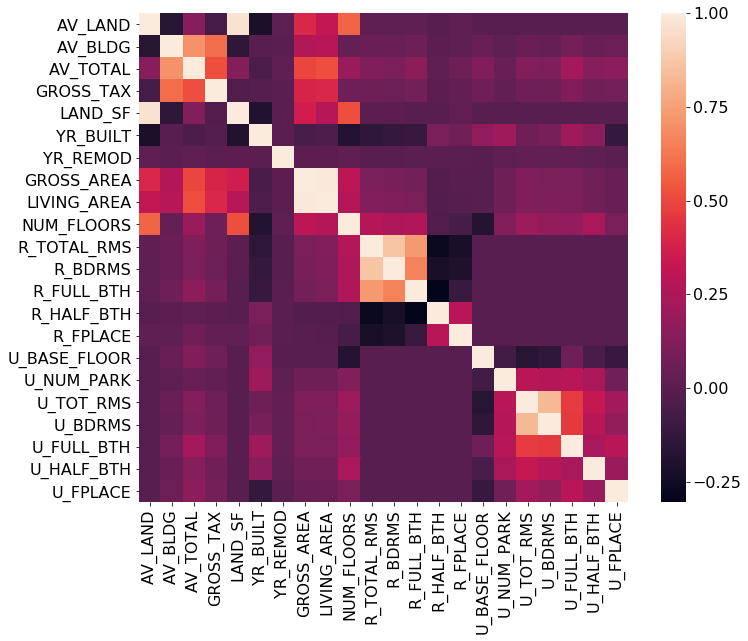

In [32]:
#plot correlation matrix
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
numeric_data = all_data[numeric_feats]
corrmat = numeric_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1.0, square=True);
plt.show()

In [33]:
#Third drop for Correlated columns
droppedColumns = ['AV_LAND','AV_BLDG','LAND_SF','GROSS_TAX','GROSS_AREA','R_TOTAL_RMS','U_TOT_RMS']
print('Before drop:', np.shape(all_data))
all_data.drop(droppedColumns, axis=1, inplace=True)
print('After drop:', np.shape(all_data))


Before drop: (161296, 53)
After drop: (161296, 46)


In [34]:
# Prepare log transform for skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print('Total numeric features:', len(numeric_feats))
print(numeric_feats)
#22 -> #15

Total numeric features: 15
Index(['AV_TOTAL', 'YR_BUILT', 'YR_REMOD', 'LIVING_AREA', 'NUM_FLOORS',
       'R_BDRMS', 'R_FULL_BTH', 'R_HALF_BTH', 'R_FPLACE', 'U_BASE_FLOOR',
       'U_NUM_PARK', 'U_BDRMS', 'U_FULL_BTH', 'U_HALF_BTH', 'U_FPLACE'],
      dtype='object')


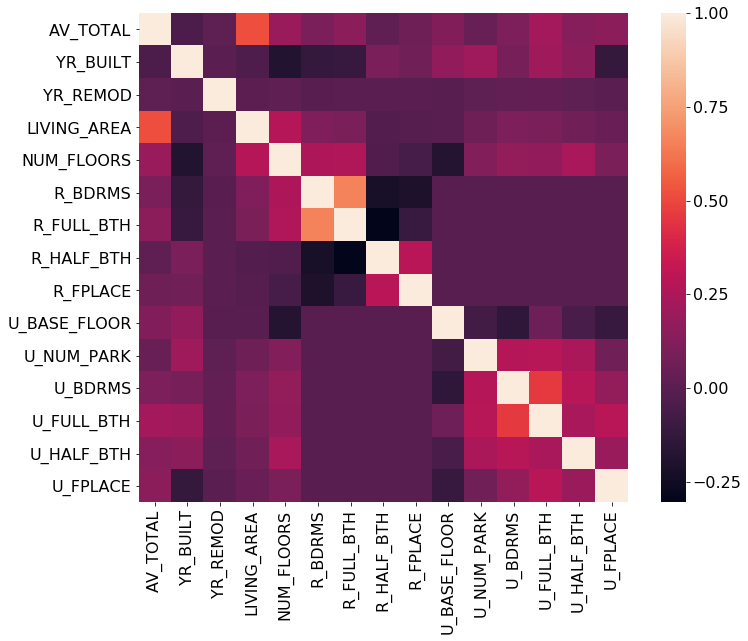

In [35]:
#plot correlation matrix
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
numeric_data = all_data[numeric_feats]
corrmat = numeric_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1.0, square=True);
plt.show()

In [36]:
myDataPath = 'M:/Work/Study/WPI-DS/CurrentCourse-DS504/DataSets/SelectedDataSet/BigDataset_Preprocess/'
outBigFile = 'BH_BigDataset_2020.csv'
outExpandFile = 'BH_BigDataset_2020Full.csv'
fileBigData = myDataPath + outBigFile
fileExpandData = myDataPath + outExpandFile
print(fileBigData)
print(fileExpandData)

M:/Work/Study/WPI-DS/CurrentCourse-DS504/DataSets/SelectedDataSet/BigDataset_Preprocess/BH_BigDataset_2020.csv
M:/Work/Study/WPI-DS/CurrentCourse-DS504/DataSets/SelectedDataSet/BigDataset_Preprocess/BH_BigDataset_2020Full.csv


In [37]:
# We save processed file to a different name for later use
all_data.to_csv(fileBigData, index=False)
print('File saved to:', fileBigData)

File saved to: M:/Work/Study/WPI-DS/CurrentCourse-DS504/DataSets/SelectedDataSet/BigDataset_Preprocess/BH_BigDataset_2020.csv


In [38]:
#Apply categorical data conversion
print('Before drop:', np.shape(all_data))
all_data = pd.get_dummies(all_data)
print('After drop:', np.shape(all_data))

Before drop: (161296, 46)
After drop: (161296, 197)


In [39]:
# We save processed file to a different name for later use
all_data.to_csv(fileExpandData, index=False)
print('File saved to:', fileExpandData)

File saved to: M:/Work/Study/WPI-DS/CurrentCourse-DS504/DataSets/SelectedDataSet/BigDataset_Preprocess/BH_BigDataset_2020Full.csv
